<a href="https://colab.research.google.com/github/AdamPeetz/PlaneGAN/blob/main/SingleImageGenerator_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating GAN images: Generating a single image

A trained generator model can be used to create unique images. 

In [1]:
# import required libraries
from numpy.random import randn
from keras.models import load_model
from matplotlib import pyplot
import os, shutil 
from google.colab import drive 
import numpy as np
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Support equations: Generating a hypersphere 

 
 

An input hypersphere is generated by creating a tensor with a random gaussian distribution and an arbitrary number of dimensions. In this case 100 dimensions. 

In [2]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	return z_input

# Loading the generator: Importing a pretrained model

A pretrained GAN model in .h5 format can be imported to create images.

In [3]:
# model path
model_location = '/content/gdrive/My Drive/planegan/test_models/dcgan_generator_model_350.h5' 

# load model
model = load_model(model_location)

# Creating images: Wrapping it all together 

 
 

The function above and the pretrained model can be used together to generate an image. A prediction is made by the model using a random point in the latent space as an input. The output array is rescaled to match the range of pixel values in an image and displayed. A seed value can be imposed to fix the output of the model. 

 

1/1 [==============================] - 1s 808ms/step


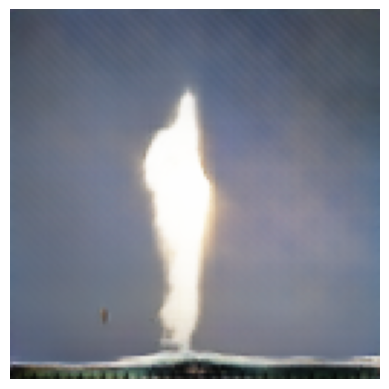

In [86]:
# set seed for repoducibility
# np.random.seed(20)

# generate images
latent_points = generate_latent_points(100, 1)
# generate images
X  = model.predict(latent_points)
# rescale
X = (X + 1) / 2.0
# turn off axis
pyplot.axis('off')
# show single image
pyplot.imshow(X[0])

Brownlee, Jason. (2019). Generative Adversarial Networks with Python. Machine Learning Mastery. EBook. 